In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA # Principle Component Analysis
from sklearn.preprocessing import StandardScaler # Feature Scaling

In [7]:
"""Unsupervised techniques are often used in the analysis of genomic data.
In particular, PCA and hierarchical clustering are popular tools. We illustrate
these techniques on the NCI60 cancer cell line microarray data, which
consists of 6,830 gene expression measurements on 64 cancer cell lines."""
x = pd.read_csv('NCI60_X.csv', index_col=0)
y = pd.read_csv('NCI60_Y.csv', index_col=0)

In [11]:
"""Each cell line is labeled with a cancer type. We do not make use of the
cancer types in performing PCA and clustering, as these are unsupervised
techniques. But after performing PCA and clustering, we will check to
see the extent to which these cancer types agree with the results of these
unsupervised techniques."""

print(x.shape, y.shape)

(64, 6830) (64, 1)


In [12]:
x[:5]

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [23]:
y[:5]

,x
1,CNS
2,CNS
3,CNS
4,RENAL
5,BREAST


In [24]:
# examining the cancer types for the cell lines
y['x'].value_counts()

RENAL          9
NSCLC          9
MELANOMA       8
COLON          7
BREAST         7
OVARIAN        6
LEUKEMIA       6
CNS            5
PROSTATE       2
K562B-repro    1
MCF7A-repro    1
UNKNOWN        1
MCF7D-repro    1
K562A-repro    1
Name: x, dtype: int64

### PCA on the NCI60 Data

6830

<IPython.core.display.Javascript object>


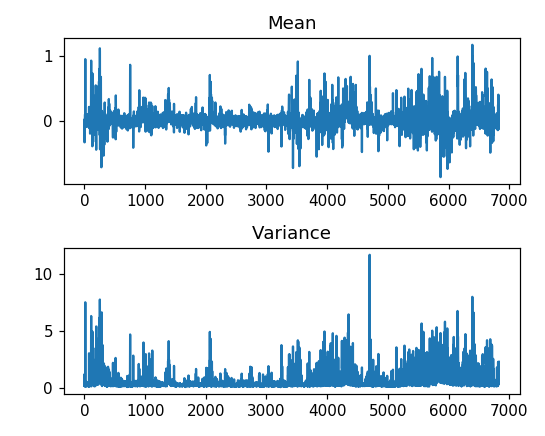

In [55]:
# Before scaling
# Let's have a look at average and variance of features
%matplotlib notebook
fig, axe = plt.subplots(2,1, figsize=(5,4))
axe[0].plot(range(x.shape[1]), x.mean())
axe[0].set_title('Mean')

axe[1].plot(range(x.shape[1]), x.var())
axe[1].set_title('Variance')

plt.tight_layout()

<IPython.core.display.Javascript object>


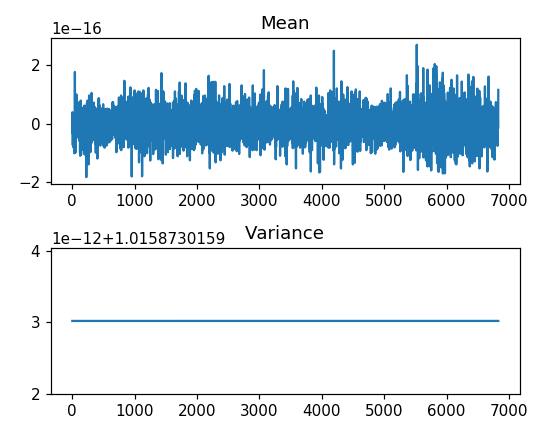

In [67]:
# Scaling
# Feature Scaling
sc = StandardScaler()
x_sc = sc.fit_transform(x.values)

df_sc = pd.DataFrame(data = x_sc, columns = x.columns)

# Mean and variance after scaling
%matplotlib notebook
fig, axe = plt.subplots(2,1, figsize=(5,4))
axe[0].plot(range(x.shape[1]), df_sc.mean())
axe[0].set_title('Mean')

axe[1].plot(range(x.shape[1]), df_sc.var())
axe[1].set_title('Variance')

plt.tight_layout()

In [68]:
#We now plot the first few principal component score vectors, in order to visualize the data.